## Guiding Question

If you were taxi driver in New York when would you want to be out driving?

### Import packages

In [1]:
# Load the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
# Show plots in jupyter notebook
%matplotlib inline

In [3]:
# Set plot style
sns.set(color_codes = True)

### Load data

In [4]:
df = pd.read_csv('/Users/kris/Downloads/bq-results-20211109-201350-gw8h4v85tqeg.csv')

# print first five rows
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_zone_name,pickup_borough,dropoff_zone_name,droppoff_borough
0,1,2018-10-04 11:29:12,2018-10-04 12:02:57,2,5.30,1,N,1,25.0,0.0,...,6.45,0.00,0.3,32.25,87,230,Financial District North,Manhattan,Times Sq/Theatre District,Manhattan
1,2,2018-10-04 14:49:20,2018-10-04 15:47:20,2,15.75,1,N,1,53.0,0.0,...,10.76,0.00,0.3,64.56,33,80,Brooklyn Heights,Brooklyn,East Williamsburg,Brooklyn
2,2,2018-10-04 14:54:56,2018-10-04 15:37:12,1,9.70,1,N,1,34.0,0.0,...,8.11,5.76,0.3,48.67,164,138,Midtown South,Manhattan,LaGuardia Airport,Queens
3,2,2018-10-04 15:21:58,2018-10-04 16:00:25,1,8.57,1,N,1,30.5,0.0,...,7.41,5.76,0.3,44.47,138,233,LaGuardia Airport,Queens,UN/Turtle Bay South,Manhattan
4,2,2018-10-04 16:05:05,2018-10-04 16:54:19,2,9.62,1,N,1,37.0,1.0,...,11.14,5.76,0.3,55.70,234,138,Union Sq,Manhattan,LaGuardia Airport,Queens


In [5]:
# print info
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926495 entries, 0 to 3926494
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   vendor_id            3926495 non-null  int64  
 1   pickup_datetime      3926495 non-null  object 
 2   dropoff_datetime     3926495 non-null  object 
 3   passenger_count      3926495 non-null  int64  
 4   trip_distance        3926495 non-null  float64
 5   rate_code            3926495 non-null  int64  
 6   store_and_fwd_flag   3926495 non-null  object 
 7   payment_type         3926495 non-null  int64  
 8   fare_amount          3926495 non-null  float64
 9   extra                3926495 non-null  float64
 10  mta_tax              3926495 non-null  float64
 11  tip_amount           3926495 non-null  float64
 12  tolls_amount         3926495 non-null  float64
 13  imp_surcharge        3926495 non-null  float64
 14  total_amount         3926495 non-null  float64
 15

In [6]:
# print stats on each column
df.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06,3.926495e+06
mean,1.625301e+00,1.573247e+00,3.017916e+00,1.054695e+00,1.306687e+00,1.364929e+01,3.235596e-01,4.968802e-01,1.945130e+00,3.786496e-01,2.994456e-01,1.709672e+01,1.632700e+02,1.615007e+02
std,5.712704e-01,1.217387e+00,3.880768e+00,6.241305e-01,4.813528e-01,2.039163e+02,4.741217e-01,6.457136e-02,2.723456e+00,1.829482e+00,1.739151e-02,2.041431e+02,6.655171e+01,7.042790e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.750000e+02,-4.500000e+00,-5.000000e-01,-8.264000e+01,-2.000000e+01,-3.000000e-01,-4.753000e+02,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00,1.140000e+02,1.070000e+02
50%,2.000000e+00,1.000000e+00,1.650000e+00,1.000000e+00,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.460000e+00,0.000000e+00,3.000000e-01,1.230000e+01,1.620000e+02,1.620000e+02
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.550000e+00,0.000000e+00,3.000000e-01,1.880000e+01,2.330000e+02,2.340000e+02
max,4.000000e+00,9.000000e+00,1.765000e+02,9.900000e+01,4.000000e+00,4.033236e+05,8.192000e+01,7.300000e+01,4.900000e+02,9.106300e+02,4.500000e-01,4.034082e+05,2.650000e+02,2.650000e+02


In [7]:
# convert dropoff_datetime and pickup_datetime from string to datetime
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926495 entries, 0 to 3926494
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   vendor_id            int64         
 1   pickup_datetime      datetime64[ns]
 2   dropoff_datetime     datetime64[ns]
 3   passenger_count      int64         
 4   trip_distance        float64       
 5   rate_code            int64         
 6   store_and_fwd_flag   object        
 7   payment_type         int64         
 8   fare_amount          float64       
 9   extra                float64       
 10  mta_tax              float64       
 11  tip_amount           float64       
 12  tolls_amount         float64       
 13  imp_surcharge        float64       
 14  total_amount         float64       
 15  pickup_location_id   int64         
 16  dropoff_location_id  int64         
 17  pickup_zone_name     object        
 18  pickup_borough       object        
 19  dropoff_zone_name    

In [8]:
# print first five rows
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_zone_name,pickup_borough,dropoff_zone_name,droppoff_borough
0,1,2018-10-04 11:29:12,2018-10-04 12:02:57,2,5.30,1,N,1,25.0,0.0,...,6.45,0.00,0.3,32.25,87,230,Financial District North,Manhattan,Times Sq/Theatre District,Manhattan
1,2,2018-10-04 14:49:20,2018-10-04 15:47:20,2,15.75,1,N,1,53.0,0.0,...,10.76,0.00,0.3,64.56,33,80,Brooklyn Heights,Brooklyn,East Williamsburg,Brooklyn
2,2,2018-10-04 14:54:56,2018-10-04 15:37:12,1,9.70,1,N,1,34.0,0.0,...,8.11,5.76,0.3,48.67,164,138,Midtown South,Manhattan,LaGuardia Airport,Queens
3,2,2018-10-04 15:21:58,2018-10-04 16:00:25,1,8.57,1,N,1,30.5,0.0,...,7.41,5.76,0.3,44.47,138,233,LaGuardia Airport,Queens,UN/Turtle Bay South,Manhattan
4,2,2018-10-04 16:05:05,2018-10-04 16:54:19,2,9.62,1,N,1,37.0,1.0,...,11.14,5.76,0.3,55.70,234,138,Union Sq,Manhattan,LaGuardia Airport,Queens


In [9]:
# Create columns for date only
df['pickup_date_only'] = df['pickup_datetime'].dt.date.astype('datetime64')
df['dropoff_date_only'] = df['dropoff_datetime'].dt.date.astype('datetime64')

# Create columns for day name
df['pickup_day'] = df['pickup_date_only'].dt.day_name()
df['dropoff_day'] = df['pickup_date_only'].dt.day_name()

# Create columns for hour
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,pickup_zone_name,pickup_borough,dropoff_zone_name,droppoff_borough,pickup_date_only,dropoff_date_only,pickup_day,dropoff_day,pickup_hour,dropoff_hour
0,1,2018-10-04 11:29:12,2018-10-04 12:02:57,2,5.30,1,N,1,25.0,0.0,...,Financial District North,Manhattan,Times Sq/Theatre District,Manhattan,2018-10-04,2018-10-04,Thursday,Thursday,11,12
1,2,2018-10-04 14:49:20,2018-10-04 15:47:20,2,15.75,1,N,1,53.0,0.0,...,Brooklyn Heights,Brooklyn,East Williamsburg,Brooklyn,2018-10-04,2018-10-04,Thursday,Thursday,14,15
2,2,2018-10-04 14:54:56,2018-10-04 15:37:12,1,9.70,1,N,1,34.0,0.0,...,Midtown South,Manhattan,LaGuardia Airport,Queens,2018-10-04,2018-10-04,Thursday,Thursday,14,15
3,2,2018-10-04 15:21:58,2018-10-04 16:00:25,1,8.57,1,N,1,30.5,0.0,...,LaGuardia Airport,Queens,UN/Turtle Bay South,Manhattan,2018-10-04,2018-10-04,Thursday,Thursday,15,16
4,2,2018-10-04 16:05:05,2018-10-04 16:54:19,2,9.62,1,N,1,37.0,1.0,...,Union Sq,Manhattan,LaGuardia Airport,Queens,2018-10-04,2018-10-04,Thursday,Thursday,16,16


In [10]:
# calculate the % of missing data for each column
pd.DataFrame({'Missing Value (%)': df.isnull().sum()/len(df)*100})

,Missing Value (%)
vendor_id,0.000000
pickup_datetime,0.000000
dropoff_datetime,0.000000
passenger_count,0.000000
trip_distance,0.000000
rate_code,0.000000
store_and_fwd_flag,0.000000
payment_type,0.000000
fare_amount,0.000000
extra,0.000000


In [11]:
# total number of records with missing values for each column
df.isna().sum()

vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
pickup_zone_name       58742
pickup_borough         58742
dropoff_zone_name      60059
droppoff_borough       60059
pickup_date_only           0
dropoff_date_only          0
pickup_day                 0
dropoff_day                0
pickup_hour                0
dropoff_hour               0
dtype: int64

In [12]:
# total number of missing values
df.isna().sum().sum()

237602

In [13]:
# total number of cells/values
print(df.size)

106015365


In [14]:
# size is counting individual cells rather than records
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926495 entries, 0 to 3926494
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   vendor_id            3926495 non-null  int64         
 1   pickup_datetime      3926495 non-null  datetime64[ns]
 2   dropoff_datetime     3926495 non-null  datetime64[ns]
 3   passenger_count      3926495 non-null  int64         
 4   trip_distance        3926495 non-null  float64       
 5   rate_code            3926495 non-null  int64         
 6   store_and_fwd_flag   3926495 non-null  object        
 7   payment_type         3926495 non-null  int64         
 8   fare_amount          3926495 non-null  float64       
 9   extra                3926495 non-null  float64       
 10  mta_tax              3926495 non-null  float64       
 11  tip_amount           3926495 non-null  float64       
 12  tolls_amount         3926495 non-null  float64       
 1

In [15]:
# percentage of missing values
# this dividing total records with missing values by total number of cells
df.isnull().sum().sum()/df.size * 100

0.22412034331061348

In [16]:
# % of missing data
df.isnull().sum().sum()/len(df.index) * 100

6.051249269386565

In [17]:
# Drop Missing Values and get rid of EWR borough
df_nmv = df.dropna(axis=0)
df_nmv = df_nmv[(df_nmv['pickup_borough'] != 'EWR')]

# this leaves with a total of 3854761 non null records/rows
print(df.info(show_counts=True))
print(df_nmv.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926495 entries, 0 to 3926494
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   vendor_id            3926495 non-null  int64         
 1   pickup_datetime      3926495 non-null  datetime64[ns]
 2   dropoff_datetime     3926495 non-null  datetime64[ns]
 3   passenger_count      3926495 non-null  int64         
 4   trip_distance        3926495 non-null  float64       
 5   rate_code            3926495 non-null  int64         
 6   store_and_fwd_flag   3926495 non-null  object        
 7   payment_type         3926495 non-null  int64         
 8   fare_amount          3926495 non-null  float64       
 9   extra                3926495 non-null  float64       
 10  mta_tax              3926495 non-null  float64       
 11  tip_amount           3926495 non-null  float64       
 12  tolls_amount         3926495 non-null  float64       
 1

In [18]:
# we can see that there are no more missing values
pd.DataFrame({'Missing Value (%)': df_nmv.isnull().sum()/len(df)*100})

,Missing Value (%)
vendor_id,0.0
pickup_datetime,0.0
dropoff_datetime,0.0
passenger_count,0.0
trip_distance,0.0
rate_code,0.0
store_and_fwd_flag,0.0
payment_type,0.0
fare_amount,0.0
extra,0.0


In [19]:
# Count the number of trips for each weekday
trip_count = df_nmv.pickup_day.value_counts()

trip_count = trip_count.reindex(index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

trip_count = trip_count.rename(index={'Sunday': 'Sun', 'Monday': 'Mon', 'Tuesday': 'Tues', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat'})

print(type(trip_count))

<class 'pandas.core.series.Series'>


In [20]:
# series to dataframe
trip_count = trip_count.to_frame()

# reset index
trip_count = trip_count.reset_index()

# rename columns
trip_count = trip_count.rename(columns={'index': 'pickup_day', 'pickup_day': 'number_of_rides'})

# print dataframe
trip_count

,pickup_day,number_of_rides
0,Sun,491932
1,Mon,480553
2,Tues,553553
3,Wed,582390
4,Thu,587048
5,Fri,585993
6,Sat,572908


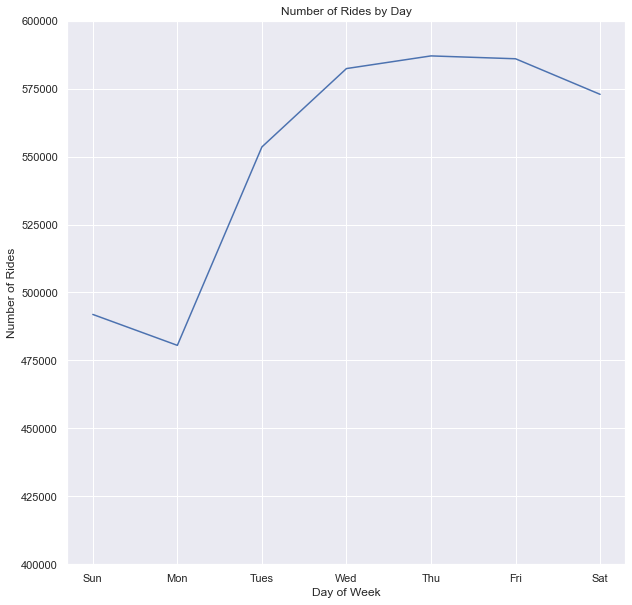

In [21]:
# create line plot that displays the number of rides by day
line,ax = plt.subplots(figsize=(10,10))

p = sns.lineplot(data=trip_count, x='pickup_day', y='number_of_rides')
p.set_title('Number of Rides by Day')

p.set(xlabel = 'Day of Week', ylabel = 'Number of Rides', ylim=(400000, 600000))

plt.savefig('number-of-rides-by-day-line-plot.png', dpi=300)
plt.show()

In [60]:
# create a colume for number of trips per hour in a day

df_nmv.pickup_hour.value_counts().sort_index(ascending=True)

0     120613
1      85763
2      59753
3      42285
4      32647
5      38098
6      87660
7     150007
8     176398
9     179061
10    179807
11    188248
12    194731
13    193314
14    206319
15    208157
16    193508
17    222944
18    245091
19    242591
20    218890
21    213149
22    203772
23    171571
Name: pickup_hour, dtype: int64

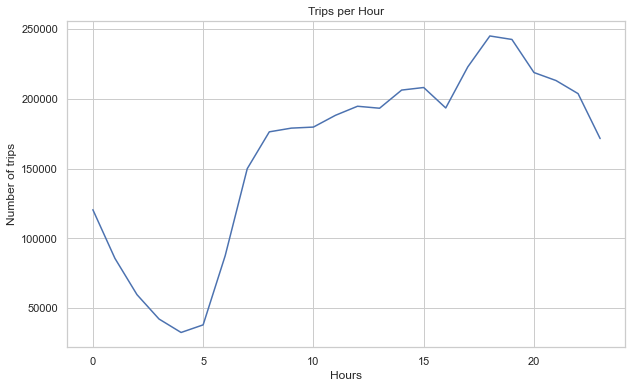

In [61]:
# if going to work by taxi, it would be easier to call a taxi before 7am. 6pm - 7pm is the hardest time to call a taxi during a day
line= plt.subplots(figsize=(10,6))

df_nmv['pickup_hour'].value_counts().sort_index(ascending=True).plot(kind = 'line')
plt.xlabel('Hours')
plt.ylabel('Number of trips')
plt.title ('Trips per Hour')
plt.savefig('Trips per Hour', dpi=300)
plt.show()

In [22]:
# what is the % split of number of trips for each borough? 
borough = df_nmv.groupby('pickup_borough').size()
print(borough)

pickup_borough
Bronx               5726
Brooklyn           52698
Manhattan        3539742
Queens            256063
Staten Island        148
dtype: int64


In [23]:
pd.DataFrame({'Percentage of trips for each borough (%)': borough.values/borough.values.sum()*100}, index=borough.index )

,Percentage of trips for each borough (%)
pickup_borough,
Bronx,0.148558
Brooklyn,1.367225
Manhattan,91.836943
Queens,6.643434
Staten Island,0.003840


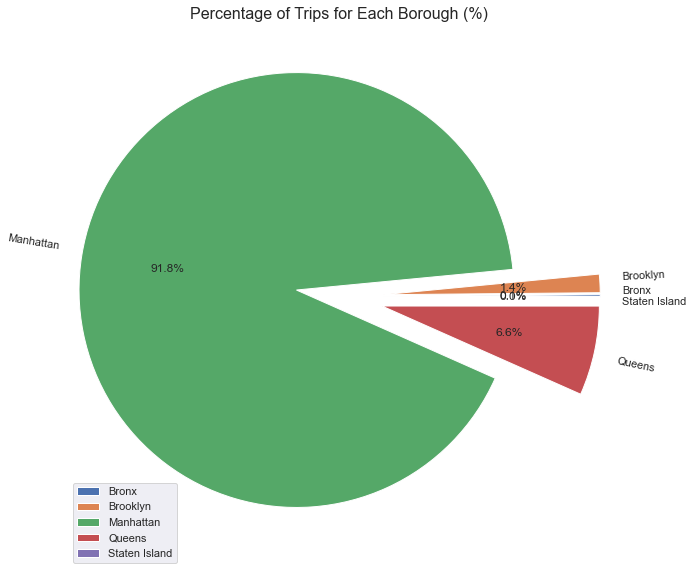

In [24]:
# Create a Pie Chart
pie, ax = plt.subplots(figsize=[10,10])

plt.pie(borough.values, autopct="%1.1f%%", explode=[0.2]*5, labels=borough.index, pctdistance=0.6,
        labeldistance=1.1, rotatelabels=True)

plt.title("Percentage of Trips for Each Borough (%)", fontsize=16)

# plotting legend 
plt.legend(loc='lower left')

plt.savefig('/Users/kris/Downloads/pie-percentage-of-tips-by-borough.png', dpi=300)
plt.show()

### Average Tip Amount

In [25]:
#  what borough has the average tip amount?
borough_tips = df_nmv.groupby('pickup_borough')['tip_amount'].mean()

print(borough_tips)

pickup_borough
Bronx            0.989521
Brooklyn         1.710208
Manhattan        1.692700
Queens           5.220128
Staten Island    1.061554
Name: tip_amount, dtype: float64


In [26]:
# tips = df_nmv['tip_amount', 'pickup_borough']
df_nmv['tips_percentage'] = (df_nmv['tip_amount']/df_nmv['total_amount'])*100

tips_percentage = df_nmv.groupby('pickup_borough')['tips_percentage'].mean()

print(tips_percentage)

pickup_borough
Bronx             3.020464
Brooklyn          8.529843
Manhattan        10.755050
Queens           10.268658
Staten Island     2.570835
Name: tips_percentage, dtype: float64


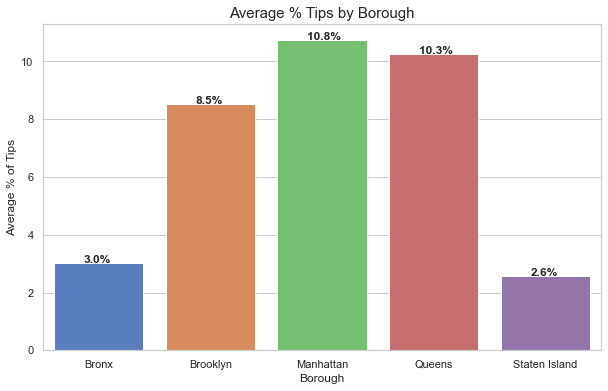

In [27]:
# Create a Bar Chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=tips_percentage.index, y=tips_percentage.values, ci=None, palette="muted",orient='v', )
ax.set_title("Average % Tips by Borough", fontsize=15)
ax.set_xlabel ("Borough")

# Is this a percentage? This should be dollar average.
ax.set_ylabel ('Average % of Tips')

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3, rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    
    
plt.savefig('/Users/kris/Downloads/average-tips-by-borough-bar-chart.png', dpi=300)

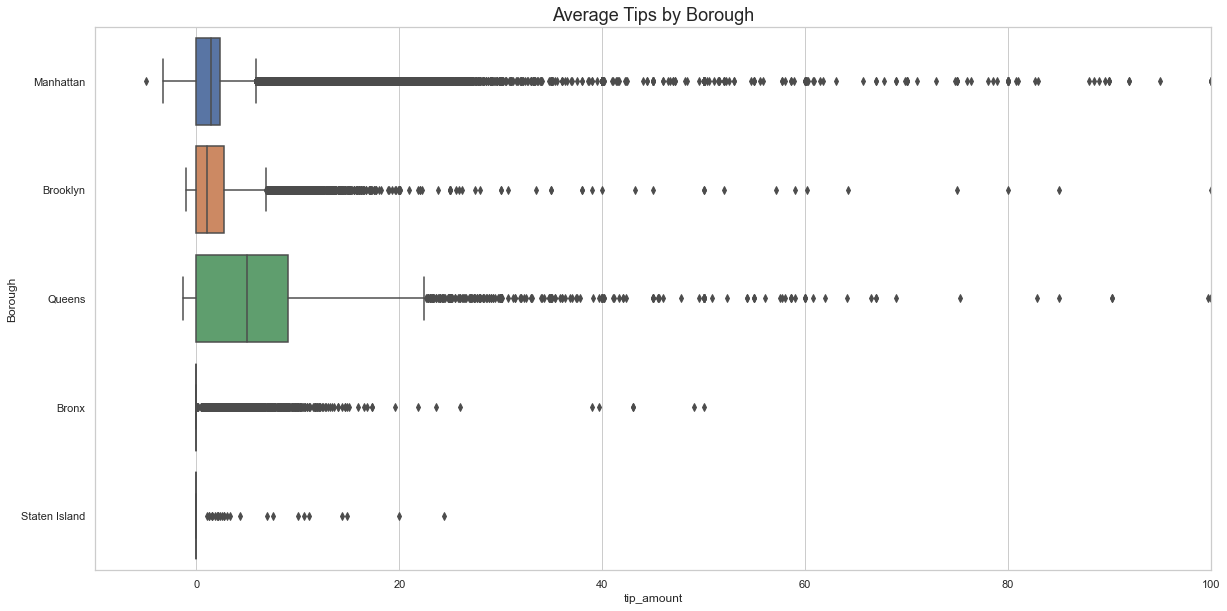

In [28]:
# Create a Box Chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x=df_nmv['tip_amount'], y= df_nmv['pickup_borough'])
ax.set_title("Average Tips by Borough", fontsize=18)
ax.set_ylabel ("Borough")
ax.set(xlim=(-10, 100))

plt.savefig('/Users/kris/Downloads/average-tips-by-borough-box-plot.png', dpi=300)

In [29]:
# average tip amount by day
day_tips = df_nmv.groupby('pickup_day')['tips_percentage'].mean()

# reorder the index
day_tips = day_tips.reindex(index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# rename the index to weekday abbreviations
day_tips = day_tips.rename(index={'Sunday': 'Sun', 'Monday': 'Mon', 'Tuesday': 'Tues', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat'})

print(day_tips)

pickup_day
Sun     10.164538
Mon     10.712984
Tues    10.951274
Wed     11.018029
Thu     11.029484
Fri     10.660003
Sat     10.155206
Name: tips_percentage, dtype: float64


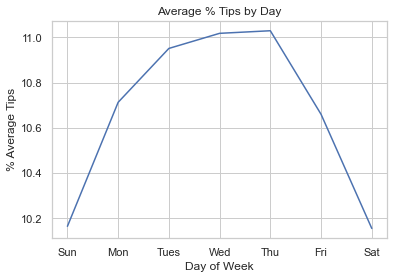

In [30]:
# average tips by day
p = sns.lineplot(x=day_tips.index, y=day_tips.values)
p.set_title('Average % Tips by Day')

p.set(xlabel = 'Day of Week', ylabel = '% Average Tips')

plt.savefig('/Users/kris/Downloads/images/average-tips-by-day-line-plot.png', dpi=300)

### Trip Time

In [31]:
# create a column called trip_time by subtracking pickup_time from dropoff_time
df_nmv['trip_time'] = df_nmv['dropoff_datetime'] - df_nmv['pickup_datetime']

# convert df['trip_time'] from time delta to number of minutes
df_nmv['trip_time_minutes'] = df_nmv['trip_time'].dt.total_seconds()/60

df_nmv['trip_time_minutes'].describe()

count    3.854377e+06
mean     1.850072e+01
std      6.837289e+01
min     -4.815800e+03
25%      7.000000e+00
50%      1.188333e+01
75%      1.975000e+01
max      8.711867e+03
Name: trip_time_minutes, dtype: float64

### Box Plot

If we try to plot trip_time_minutes using a boxplot, you can see we have very many outliers and the data is skewed to the right. 

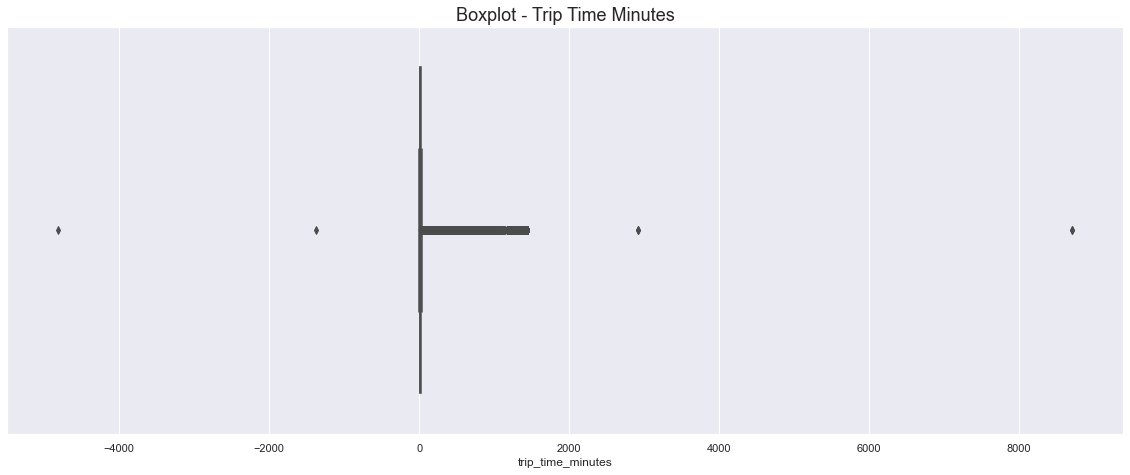

In [32]:
# print a box plot for trip_time_minutes
sns.set(rc = {'figure.figsize':(20,7.5)})
sns.boxplot(x=df_nmv['trip_time_minutes']).set_title('Boxplot - Trip Time Minutes',fontsize=18)

ax.set_title("Trip Time", fontsize=18)
ax.set_xlabel ('Minutes')

plt.savefig('/Users/kris/Downloads/images/trip_time-box-plot.png', dpi=300)

### Distribution Plot

If we try to plot the distribution of trip_time_minutes, you can see we have very many outliers and the data is skewed. 

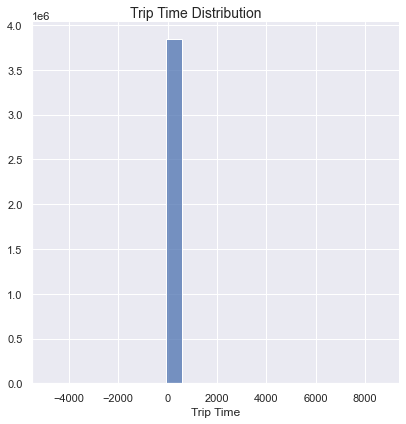

In [33]:
# sns.set(rc = {'figure.figsize':(20,8)})
dist = sns.displot(x=df_nmv['trip_time_minutes'], bins=20, height=6, aspect=1)

dist.set(xlabel = 'Trip Time', ylabel = '')

dist.fig.suptitle('Trip Time Distribution', fontsize=14)

plt.savefig('/Users/kris/Downloads/images/trip_time-distribution-plot.png', dpi=300)
plt.show()

In [34]:
# print stats on trip_time
print('The median trip time in minutes is',df_nmv['trip_time_minutes'].median())
print('The mean trip time in minutes is',df_nmv['trip_time_minutes'].mean())
print('The min value of trip time in minutes is',df_nmv['trip_time_minutes'].min())
print('The max value of trip time in minutes is',df_nmv['trip_time_minutes'].max())

print('25% of the values are below',df_nmv['trip_time_minutes'].quantile(q=0.25))
print('50% of the values are below',df_nmv['trip_time_minutes'].quantile(q=0.50))
print('75% of the values are below',df_nmv['trip_time_minutes'].quantile(q=0.75))
print('95% of the values are below',df_nmv['trip_time_minutes'].quantile(q=0.95))

The median trip time in minutes is 11.883333333333333
The mean trip time in minutes is 18.500722641646046
The min value of trip time in minutes is -4815.8
The max value of trip time in minutes is 8711.866666666667
25% of the values are below 7.0
50% of the values are below 11.883333333333333
75% of the values are below 19.75
95% of the values are below 39.666666666666664


In [35]:
# create dataframe with no negative values
data_triptime = df_nmv.loc[df_nmv['trip_time_minutes']>0]

lessThan40 = data_triptime.loc[(data_triptime['trip_time_minutes'] < 40)]
print(lessThan40.info(show_counts = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665848 entries, 0 to 3926494
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   vendor_id            3665848 non-null  int64          
 1   pickup_datetime      3665848 non-null  datetime64[ns] 
 2   dropoff_datetime     3665848 non-null  datetime64[ns] 
 3   passenger_count      3665848 non-null  int64          
 4   trip_distance        3665848 non-null  float64        
 5   rate_code            3665848 non-null  int64          
 6   store_and_fwd_flag   3665848 non-null  object         
 7   payment_type         3665848 non-null  int64          
 8   fare_amount          3665848 non-null  float64        
 9   extra                3665848 non-null  float64        
 10  mta_tax              3665848 non-null  float64        
 11  tip_amount           3665848 non-null  float64        
 12  tolls_amount         3665848 non-null  flo

In [36]:
# print stats on trip_time
print('The average trip time in minutes is',lessThan40['trip_time_minutes'].mean())
print('The median trip time in minutes is',lessThan40['trip_time_minutes'].median())
print('The min value of trip time in minutes is',lessThan40['trip_time_minutes'].min())
print('The max value of trip time in minutes is',lessThan40['trip_time_minutes'].max())

print('25% of the values are below',lessThan40['trip_time_minutes'].quantile(q=0.25))
print('50% of the values are below',lessThan40['trip_time_minutes'].quantile(q=0.50))
print('75% of the values are below',lessThan40['trip_time_minutes'].quantile(q=0.75))
print('95% of the values are below',lessThan40['trip_time_minutes'].quantile(q=0.95))
print('98% of the values are below',lessThan40['trip_time_minutes'].quantile(q=0.98))

The average trip time in minutes is 13.379623759632555
The median trip time in minutes is 11.333333333333334
The min value of trip time in minutes is 0.016666666666666666
The max value of trip time in minutes is 39.983333333333334
25% of the values are below 6.783333333333333
50% of the values are below 11.333333333333334
75% of the values are below 18.183333333333334
95% of the values are below 31.050000000000004
98% of the values are below 35.55


In [37]:
# print stats
lessThan40['trip_time_minutes'].describe()

count    3.665848e+06
mean     1.337962e+01
std      8.566776e+00
min      1.666667e-02
25%      6.783333e+00
50%      1.133333e+01
75%      1.818333e+01
max      3.998333e+01
Name: trip_time_minutes, dtype: float64

### Box plot

Create a a new boxplot using our new dataframe, lessThan40. We can see there are trips that have a negative values.

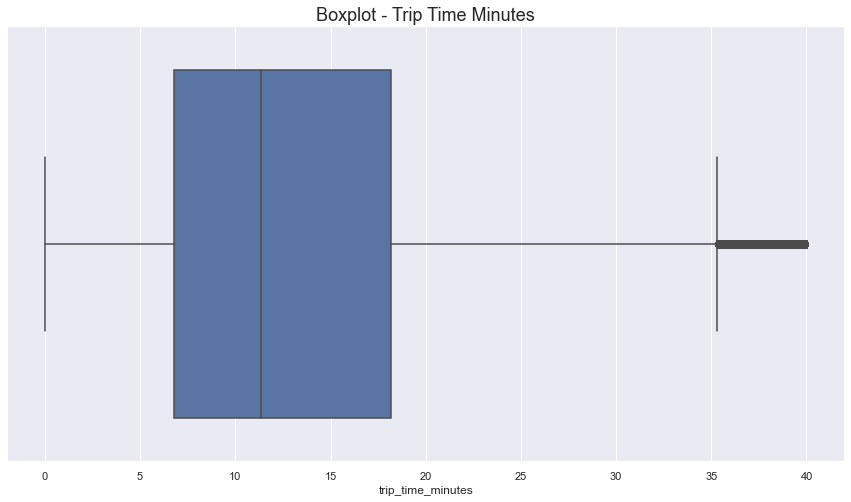

In [38]:
# omit boxplot
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x=lessThan40['trip_time_minutes']).set_title('Boxplot - Trip Time Minutes',fontsize=18)

plt.savefig('/Users/kris/Downloads/images/trip-time-cutdown-box-plot.png', dpi=300)
plt.show()

### Distribution Plot

Create a a new boxplot using our new dataframe, no_negative.

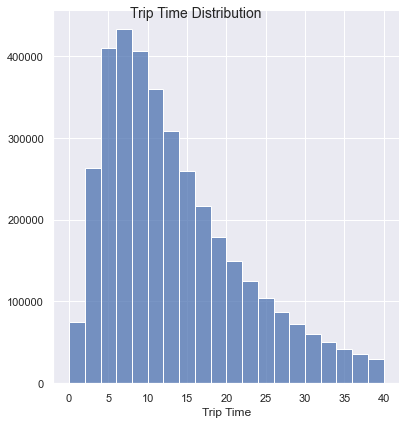

In [39]:
# sns.set(rc = {'figure.figsize':(20,8)})

dist_two = sns.displot(x=lessThan40['trip_time_minutes'], bins=20, height=6, aspect=1)

dist_two.set(xlabel = 'Trip Time', ylabel = '')

dist_two.fig.suptitle('Trip Time Distribution', fontsize=14,)

plt.savefig('/Users/kris/Downloads/images/trip-time-cutdown-distribution-plot.png', dpi=300)
plt.show()

In [40]:
lessThan40.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665848 entries, 0 to 3926494
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   vendor_id            3665848 non-null  int64          
 1   pickup_datetime      3665848 non-null  datetime64[ns] 
 2   dropoff_datetime     3665848 non-null  datetime64[ns] 
 3   passenger_count      3665848 non-null  int64          
 4   trip_distance        3665848 non-null  float64        
 5   rate_code            3665848 non-null  int64          
 6   store_and_fwd_flag   3665848 non-null  object         
 7   payment_type         3665848 non-null  int64          
 8   fare_amount          3665848 non-null  float64        
 9   extra                3665848 non-null  float64        
 10  mta_tax              3665848 non-null  float64        
 11  tip_amount           3665848 non-null  float64        
 12  tolls_amount         3665848 non-null  flo

In [41]:
# pivot dataframe to create a heat map
heatmap_pivot = lessThan40.pivot_table(index='pickup_hour', columns='pickup_day', values='trip_time_minutes', aggfunc='mean')

borough_heatmap_pivot = lessThan40.pivot_table(index='pickup_hour', columns='pickup_borough', values='trip_time_minutes', aggfunc='mean')

In [42]:
# print dataframe
heatmap_pivot

pickup_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pickup_hour,,,,,,,
0,12.854734,11.989821,13.752994,12.852899,12.062347,11.975597,11.704161
1,11.905066,11.059088,12.454567,11.799454,11.055850,10.800872,11.561931
2,10.882071,10.440484,11.448375,11.124084,10.469141,10.207553,11.021082
3,10.851802,10.872815,10.911776,10.950000,10.843343,10.473922,10.889609
4,11.994302,11.498645,11.472462,11.455223,11.841645,11.071668,11.722071
5,11.230076,11.528241,12.028790,12.413257,10.649503,10.107626,10.517706
6,10.209801,10.232135,11.064154,11.880466,9.907931,9.646054,9.958559
7,11.456841,11.205237,10.287670,10.708119,11.835956,11.587838,11.953993
8,13.260283,12.807253,10.633762,10.263874,13.948047,13.604321,13.848925


In [43]:
# print dataframe
borough_heatmap_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
pickup_hour,,,,,
0,13.771895,13.193515,12.000331,21.170976,4.733333
1,9.707692,12.760738,11.397922,18.562574,3.988889
2,9.404040,11.858709,10.953234,13.380826,5.433333
3,8.536782,11.472911,10.848202,11.834842,8.006667
4,12.367007,12.615305,11.496858,12.055421,7.325000
5,15.787807,15.823506,10.256939,18.724291,0.604167
6,18.808193,17.216510,9.557441,18.925743,0.641667
7,17.775661,16.895647,11.030302,20.578044,0.516667
8,17.498137,16.891647,12.757119,19.276505,19.475000


In [44]:
# rearrange the columns match week
heatmap_pivot = heatmap_pivot[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

heatmap_pivot

pickup_day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
pickup_hour,,,,,,,
0,12.852899,11.989821,11.975597,11.704161,12.062347,12.854734,13.752994
1,11.799454,11.059088,10.800872,11.561931,11.055850,11.905066,12.454567
2,11.124084,10.440484,10.207553,11.021082,10.469141,10.882071,11.448375
3,10.950000,10.872815,10.473922,10.889609,10.843343,10.851802,10.911776
4,11.455223,11.498645,11.071668,11.722071,11.841645,11.994302,11.472462
5,12.413257,11.528241,10.107626,10.517706,10.649503,11.230076,12.028790
6,11.880466,10.232135,9.646054,9.958559,9.907931,10.209801,11.064154
7,10.708119,11.205237,11.587838,11.953993,11.835956,11.456841,10.287670
8,10.263874,12.807253,13.604321,13.848925,13.948047,13.260283,10.633762


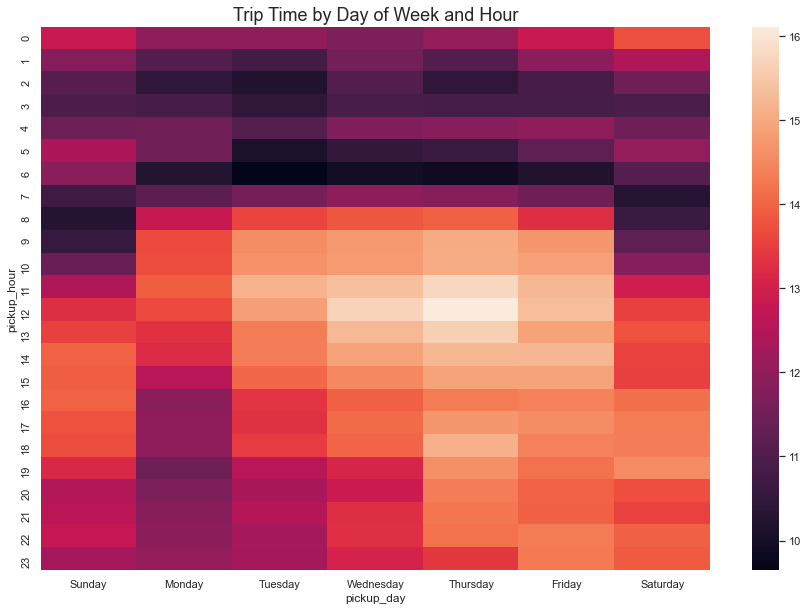

In [64]:
# heatmap of triptime minutes and 
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(heatmap_pivot).set_title('Trip Time by Day of Week and Hour',fontsize=18)

plt.savefig('/Users/kris/Downloads/images/avg-trip-time-by-day-heatmap.png', dpi=300)
plt.show()

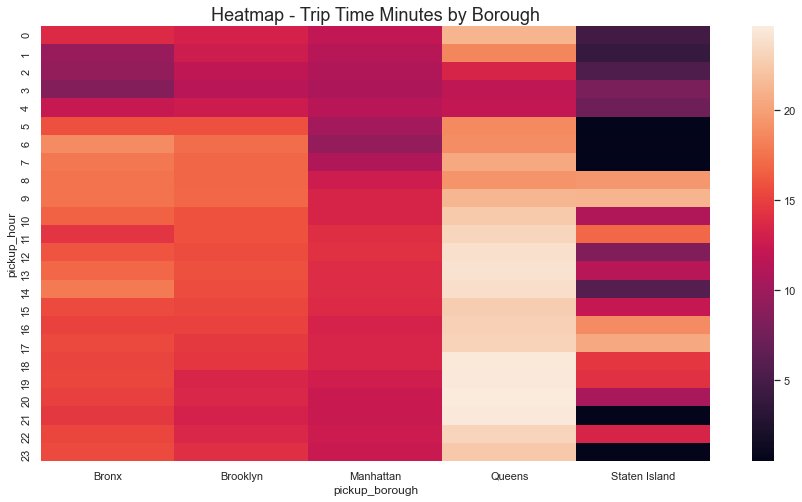

In [46]:
# heatmap of triptime minutes and 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(borough_heatmap_pivot).set_title('Heatmap - Trip Time Minutes by Borough',fontsize=18)
plt.savefig('/Users/kris/Downloads/images/avg-trip-time-by-borough-heatmap.png', dpi=300)
plt.show()

### Speed

In [47]:
# create a column called speed by dividing trip_distance from trip_time_minutes
data_triptime['speed'] = (data_triptime['trip_distance'] / data_triptime['trip_time_minutes']*60)
print(data_triptime['speed'])

0           9.422222
1          16.293103
2          13.769716
3          13.373212
4          11.723764
             ...    
3926490    10.602740
3926491     4.337349
3926492    12.008702
3926493    19.267606
3926494    22.685950
Name: speed, Length: 3854165, dtype: float64


<ipython-input-47-c378277ab462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_triptime['speed'] = (data_triptime['trip_distance'] / data_triptime['trip_time_minutes']*60)


In [48]:
# print stats on speed
data_triptime['speed'].describe()

count    3.854165e+06
mean     1.236146e+01
std      1.388194e+02
min      0.000000e+00
25%      6.824645e+00
50%      9.442623e+00
75%      1.310574e+01
max      6.264000e+04
Name: speed, dtype: float64

In [49]:
# print stats on speed
print('The std of trip time is',data_triptime['speed'].std())
print('The median speed in minutes is',data_triptime['speed'].median())
print('The mean value of speed in minutes is',data_triptime['speed'].mean())
print('The min value of speed in minutes is',data_triptime['speed'].min())
print('The max value of speed in minutes is',data_triptime['speed'].max())

print('25% of the values are below',data_triptime['speed'].quantile(q=0.25))
print('50% of the values are below',data_triptime['speed'].quantile(q=0.50))
print('75% of the values are below',data_triptime['speed'].quantile(q=0.75))
print('95% of the values are below',data_triptime['speed'].quantile(q=0.95))

The std of trip time is 138.81937465195486
The median speed in minutes is 9.442622950819674
The mean value of speed in minutes is 12.361457220632142
The min value of speed in minutes is 0.0
The max value of speed in minutes is 62640.0
25% of the values are below 6.8246445497630335
50% of the values are below 9.442622950819674
75% of the values are below 13.105740181268882
95% of the values are below 23.225806451612907


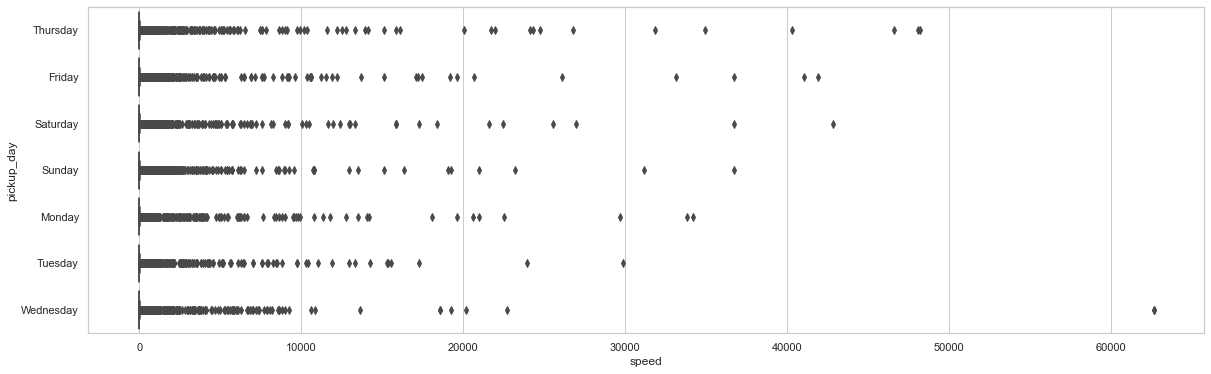

In [50]:
# print a boxplot of speed across days of the week
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,6))

ax = sns.boxplot(x=data_triptime['speed'], y= data_triptime['pickup_day'])

In [51]:
# get the average speed by day
speed_day = data_triptime.groupby('pickup_day')['speed'].mean()
speed_day = speed_day.reindex(index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
print(speed_day)

pickup_day
Sunday       14.303605
Monday       13.879138
Tuesday      11.823959
Wednesday    11.617400
Thursday     11.571064
Friday       11.443811
Saturday     12.444949
Name: speed, dtype: float64


In [52]:
print(type(speed_day))

<class 'pandas.core.series.Series'>


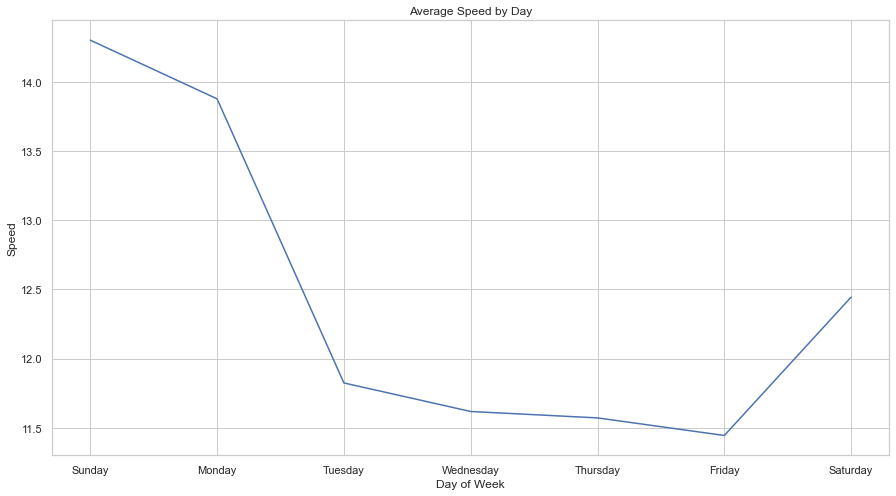

In [53]:
# Create a line chart
speed_day = sns.lineplot(x=speed_day.index, y=speed_day.values)

speed_day.set_title('Average Speed by Day')

speed_day.set(xlabel = 'Day of Week', ylabel = 'Speed')

plt.savefig('/Users/kris/Downloads/images/speed-by-day-line-plot.png', dpi=300)

In [54]:
# get the average speed by hour
speed_hour = data_triptime.groupby('pickup_hour')['speed'].mean()
print(speed_hour)

pickup_hour
0     15.611259
1     16.356679
2     16.533533
3     16.802103
4     21.808321
5     21.015225
6     16.514615
7     12.835538
8     11.156614
9     10.689893
10    10.757792
11    10.546621
12    10.327416
13    11.213269
14    10.316158
15    11.234243
16    11.799295
17    10.639631
18    10.894504
19    11.709504
20    12.927723
21    13.679901
22    14.059667
23    14.873909
Name: speed, dtype: float64


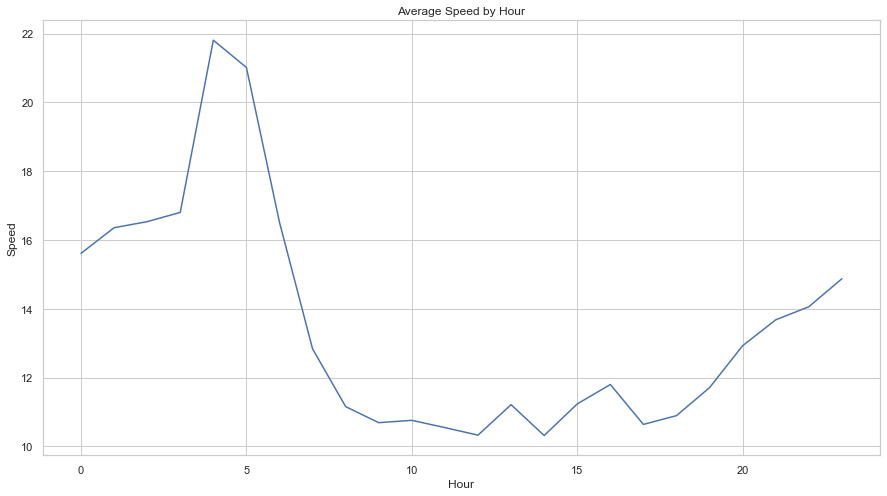

In [55]:
# Create a line chart
speed_hour = sns.lineplot(x=speed_hour.index, y=speed_hour.values)

speed_hour.set_title('Average Speed by Hour')

speed_hour.set(xlabel = 'Hour', ylabel = 'Speed')

plt.savefig('/Users/kris/Downloads/images/speed-by-hour-line-plot.png', dpi=300)

In [56]:
# average speed by pickup borough
speed_borough = data_triptime.groupby('pickup_borough')['speed'].mean().round()
print(speed_borough)

pickup_borough
Bronx            22.0
Brooklyn         21.0
Manhattan        11.0
Queens           30.0
Staten Island    46.0
Name: speed, dtype: float64


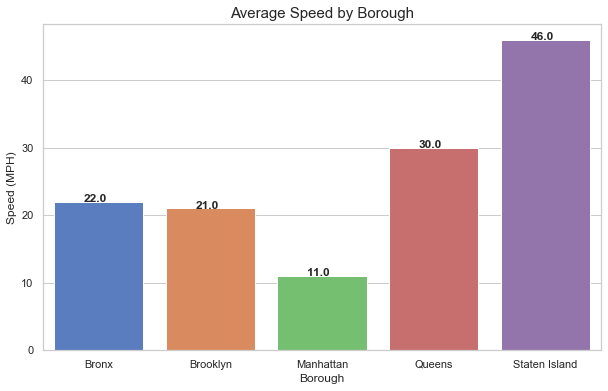

In [57]:
# Create a line chart
sns.set_style('whitegrid')
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=speed_borough.index, y=speed_borough.values, ci=None, palette="muted",orient='v', )
ax.set_title('Average Speed by Borough', fontsize=15)
ax.set_xlabel ('Borough', fontsize=12)
ax.set_ylabel ('Speed (MPH)', fontsize=12)

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 3, rect.get_height(), rect.get_height(), weight='bold')

plt.savefig('/Users/kris/Downloads/images/average-speed-by-borough-bar-chart.png', dpi=300)

### Efficiency

In [58]:
# Create a column call efficiency by dividing total_amount from trip_time_minutes
data_triptime['efficiency'] = data_triptime['total_amount'] / data_triptime['trip_time_minutes']
# data_triptime['log_efficiency'] = np.log(data_triptime['efficiency'])

effi_borough_hour = data_triptime.groupby(['pickup_borough','pickup_hour'])['efficiency', 'total_amount'].mean()
print(effi_borough_hour)

<ipython-input-58-72a5a9068f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_triptime['efficiency'] = data_triptime['total_amount'] / data_triptime['trip_time_minutes']
<ipython-input-58-72a5a9068f33>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  effi_borough_hour = data_triptime.groupby(['pickup_borough','pickup_hour'])['efficiency', 'total_amount'].mean()


                            efficiency  total_amount
pickup_borough pickup_hour                          
Bronx          0             12.485404     21.653418
               1             24.148406     18.362397
               2             40.476331     20.576300
               3             55.505306     18.269213
               4             37.519436     22.560102
...                                ...           ...
Staten Island  19             2.254025     42.043333
               20           378.452284     80.441667
               21            89.862585     72.340000
               22            20.775968     62.385714
               23           146.780488    100.300000

[120 rows x 2 columns]


                            efficiency  total_amount
pickup_borough pickup_hour                          
Bronx          0              2.524560     21.653418
               1              3.184218     18.362397
               2              3.700717     20.576300
               3              4.016479     18.269213
               4              3.624859     22.560102
...                                ...           ...
Staten Island  19             0.812717     42.043333
               20             5.936090     80.441667
               21             4.498282     72.340000
               22             3.033797     62.385714
               23             4.988938    100.300000

[120 rows x 2 columns]


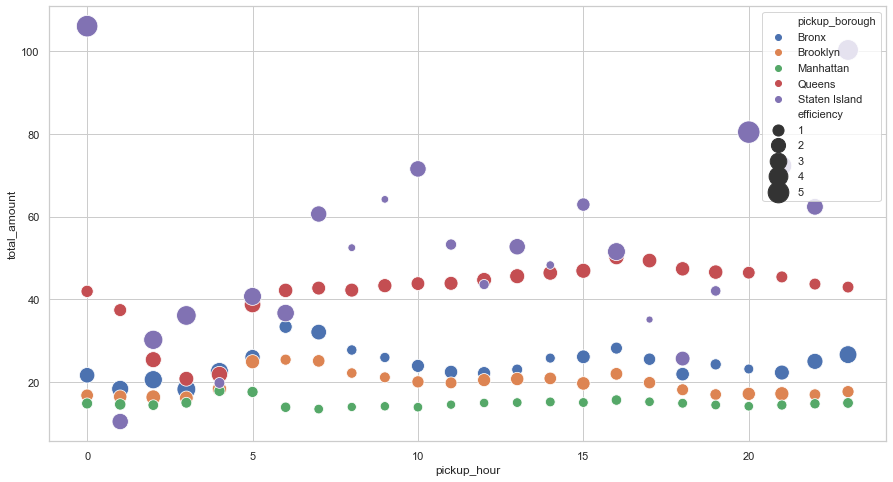

In [59]:
# Create a line chart, after logging the value to make result clear
effi_borough_hour['efficiency'] = np.log(effi_borough_hour['efficiency'])

print(effi_borough_hour)

sns.scatterplot(data=effi_borough_hour, x="pickup_hour", y='total_amount',size ='efficiency', hue='pickup_borough', sizes =(50,500))
plt.legend(loc='upper right',bbox_to_anchor=(1, 1))